In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

retrain/images/house2.jpg


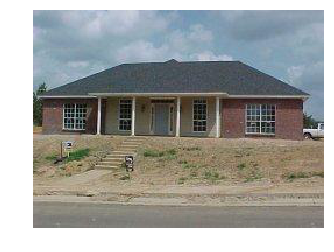

[0 3 1 4 2]
house (score = 0.96299)
car (score = 0.01429)
pet (score = 0.01092)
flower (score = 0.00802)
guitar (score = 0.00377)

retrain/images/car3.jpg


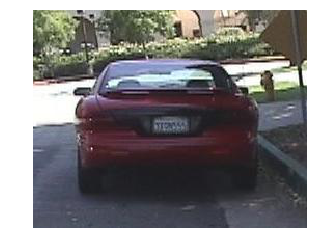

[3 1 0 4 2]
car (score = 0.89669)
pet (score = 0.05216)
house (score = 0.02830)
flower (score = 0.01582)
guitar (score = 0.00703)

retrain/images/guitar1.jpg


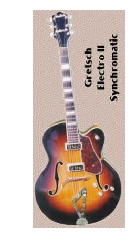

[2 1 4 0 3]
guitar (score = 0.91886)
pet (score = 0.02656)
flower (score = 0.02641)
house (score = 0.01450)
car (score = 0.01367)

retrain/images/pet2.jpg


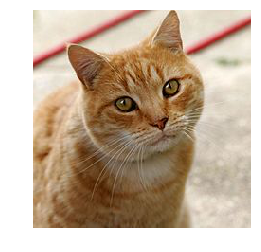

[1 4 0 2 3]
pet (score = 0.94201)
flower (score = 0.02643)
house (score = 0.01192)
guitar (score = 0.01068)
car (score = 0.00896)

retrain/images/car1.jpg


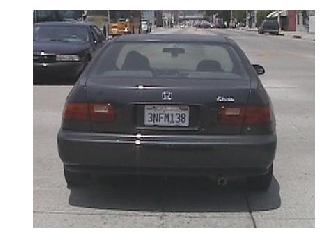

[3 1 4 0 2]
car (score = 0.97604)
pet (score = 0.00858)
flower (score = 0.00676)
house (score = 0.00541)
guitar (score = 0.00321)

retrain/images/flower2.jpg


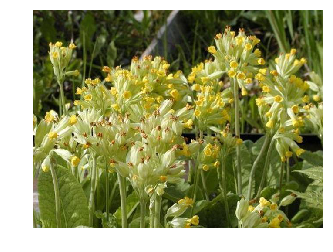

[4 1 0 2 3]
flower (score = 0.97604)
pet (score = 0.01068)
house (score = 0.00567)
guitar (score = 0.00398)
car (score = 0.00363)

retrain/images/flower3.jpg


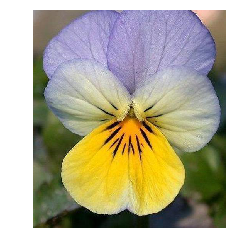

[4 1 0 3 2]
flower (score = 0.99165)
pet (score = 0.00394)
house (score = 0.00287)
car (score = 0.00096)
guitar (score = 0.00058)

retrain/images/house1.jpg


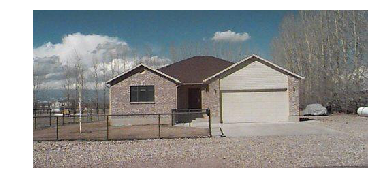

[0 1 4 3 2]
house (score = 0.84869)
pet (score = 0.07817)
flower (score = 0.03212)
car (score = 0.02793)
guitar (score = 0.01310)

retrain/images/flower1.jpg


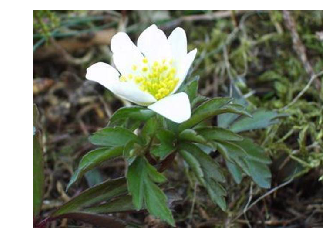

[4 1 3 0 2]
flower (score = 0.98010)
pet (score = 0.00998)
car (score = 0.00333)
house (score = 0.00331)
guitar (score = 0.00328)

retrain/images/guitar3.jpg


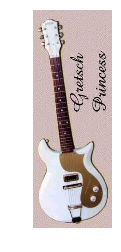

[2 1 4 0 3]
guitar (score = 0.96552)
pet (score = 0.01404)
flower (score = 0.00777)
house (score = 0.00657)
car (score = 0.00609)

retrain/images/pet1.jpg


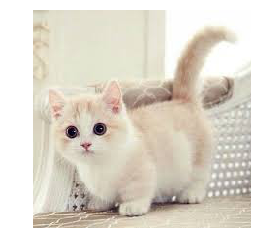

[1 4 3 0 2]
pet (score = 0.80885)
flower (score = 0.12430)
car (score = 0.03141)
house (score = 0.02130)
guitar (score = 0.01414)

retrain/images/guitar2.jpg


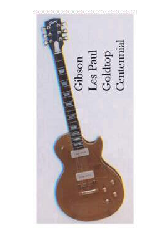

[2 1 4 3 0]
guitar (score = 0.96278)
pet (score = 0.01362)
flower (score = 0.01066)
car (score = 0.00685)
house (score = 0.00610)

retrain/images/pet3.jpg


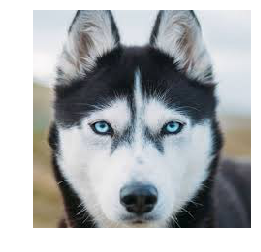

[1 0 4 2 3]
pet (score = 0.61760)
house (score = 0.12299)
flower (score = 0.09788)
guitar (score = 0.08799)
car (score = 0.07354)

retrain/images/house3.jpg


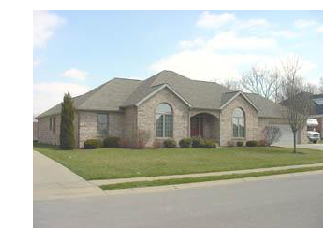

[0 3 1 4 2]
house (score = 0.91170)
car (score = 0.03154)
pet (score = 0.02445)
flower (score = 0.02389)
guitar (score = 0.00842)

retrain/images/car2.jpg


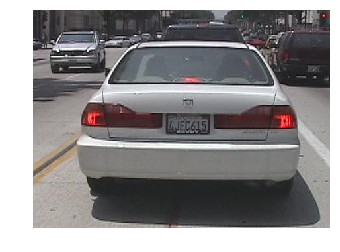

[3 1 0 4 2]
car (score = 0.97176)
pet (score = 0.01273)
house (score = 0.00590)
flower (score = 0.00531)
guitar (score = 0.00430)



In [3]:
lines = tf.gfile.GFile('retrain/output_labels.txt').readlines()
uid_to_human = {}
# 一行一行读取数据
for uid, line in enumerate(lines):
    # 去掉换行符
    line = line.strip('\n')
    uid_to_human[uid] = line
    
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放google训练好的模型
with tf.gfile.GFile('retrain/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')
    
    
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历目录
    for root, dirs, files, in os.walk('retrain/images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root, file), 'rb').read()
            predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})# 图片格式是jpg格式
            predictions = np.squeeze(predictions) # 把结果转为1为数据
            image_path = os.path.join(root, file)
            print(image_path)
            # 显示图片
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            # 排序
            top_k = predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()